**Importing all the crucial libraries**

In [1]:
!pip install dabl

In [2]:
!pip install shap

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dabl
import shap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score

**Data Preprocessing**

In [4]:
dataset = pd.read_csv('WildBlueberryPollinationSimulationData.csv')

In [5]:
dataset.head(10)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
5,5,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.309669,0.366284,27.345453,2825.003738
6,6,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.284443,0.352186,26.101179,2625.269164
7,7,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.246568,0.342826,25.042361,2379.905214
8,8,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.427977,0.414711,32.334153,4234.868585
9,9,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.464366,0.436346,34.849953,5356.871861


In [6]:
dataset.drop('Row#', axis='columns', inplace=True)

In [7]:
dataset.head(10)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
5,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.309669,0.366284,27.345453,2825.003738
6,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.284443,0.352186,26.101179,2625.269164
7,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.246568,0.342826,25.042361,2379.905214
8,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.427977,0.414711,32.334153,4234.868585
9,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.464366,0.436346,34.849953,5356.871861


In [8]:
dataset.tail(10)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
767,20.0,0.000,0.585,0.000,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.599984,0.529791,46.585105,7575.801245
768,20.0,0.000,0.000,0.585,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.249335,0.320727,23.412776,2605.696759
769,20.0,0.000,0.000,0.000,0.585,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.361519,0.389815,29.559494,4254.825135
770,20.0,0.000,0.293,0.234,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.497503,0.453339,36.633376,5449.421199
771,20.0,0.000,0.058,0.409,0.117,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.335927,0.377012,28.135899,3471.192143
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735
776,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,24.00,0.39,0.384646,0.392303,29.742583,3943.131681


# Exploratory Data Analysis

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [10]:
import plotly.express as px
fig = px.histogram(dataset, x="yield")
fig.show()

Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning:

Dropped 1 outliers in column bumbles.

/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning:

Dropped 4 outliers in column honeybee.



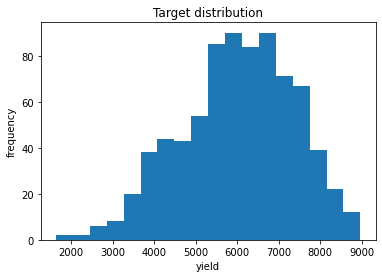

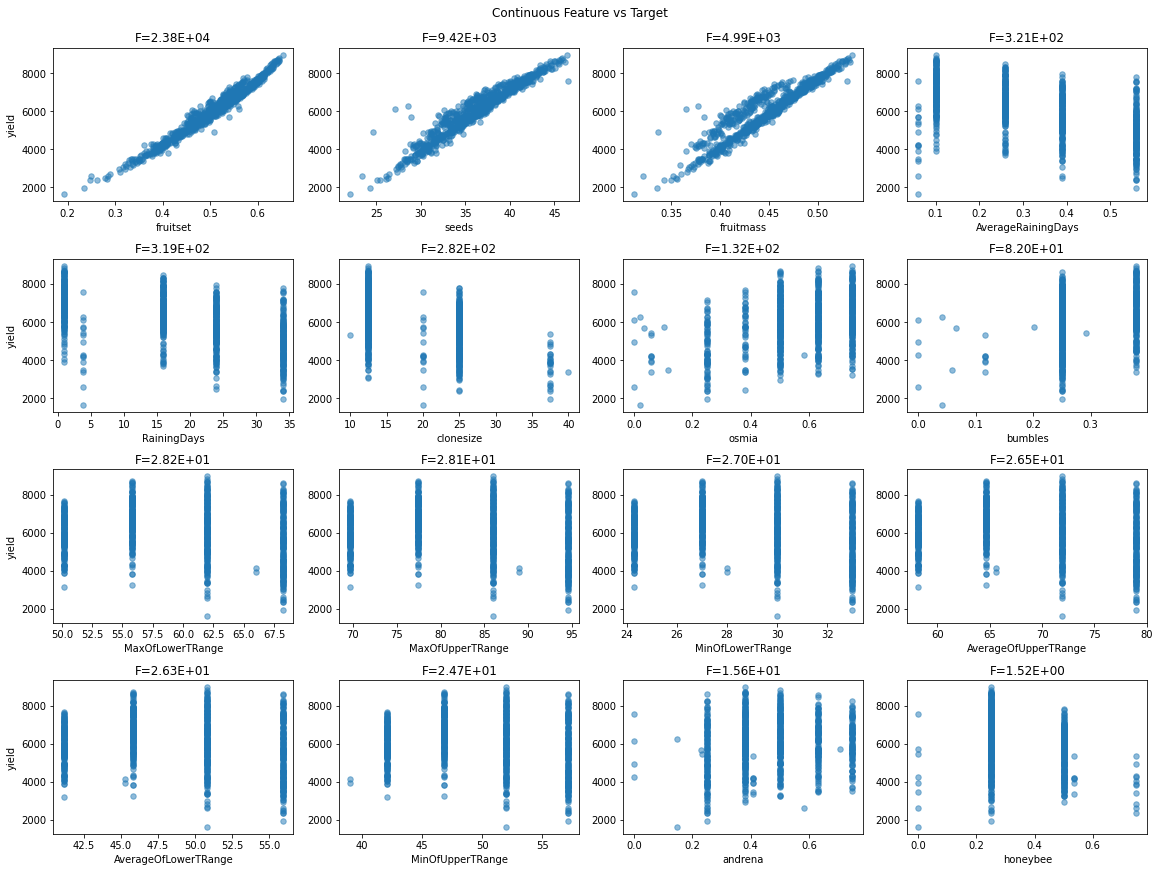

In [11]:
dabl.plot(dataset, target_col="yield")

**Removing Outliers**

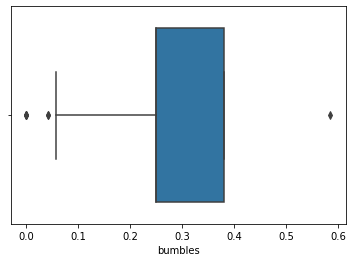

In [12]:
sns.boxplot(x=dataset['bumbles'])

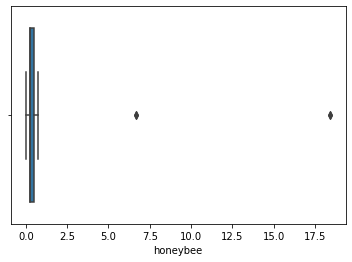

In [13]:
sns.boxplot(x=dataset['honeybee'])

In [14]:
q1 = dataset.quantile(0.25)
q2 = dataset.quantile(0.75)
iqr = q2 -q1
print(iqr)

clonesize                 12.500000
honeybee                   0.250000
bumbles                    0.130000
andrena                    0.250000
osmia                      0.250000
MaxOfUpperTRange          11.600000
MinOfUpperTRange           5.200000
AverageOfUpperTRange       7.200000
MaxOfLowerTRange          10.200000
MinOfLowerTRange           3.000000
AverageOfLowerTRange       5.000000
RainingDays               20.230000
AverageRainingDays         0.290000
fruitset                   0.106571
fruitmass                  0.059869
seeds                      6.123577
yield                   1897.334830
dtype: float64


In [15]:
dataset = dataset[~((dataset < (q1 - 1.5 * iqr)) |(dataset > (q2 + 1.5 * iqr))).any(axis=1)]
dataset.shape

(752, 17)

**Correlation**

In [16]:
plt.figure(figsize=(20,20))
c = dataset.corr()


<Figure size 1440x1440 with 0 Axes>

In [17]:
c

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.849859,0.036613,0.026053,-0.100149,0.008441,0.008498,0.008575,0.008494,0.008472,0.008484,-0.036500,-0.038758,-0.543512,-0.459179,-0.484549,-0.497965
honeybee,0.849859,1.000000,0.112885,0.197218,0.128819,0.004620,0.004629,0.004648,0.004628,0.004625,0.004617,-0.004874,-0.005336,-0.418614,-0.364690,-0.383849,-0.361844
bumbles,0.036613,0.112885,1.000000,-0.068276,0.160133,0.010844,0.010840,0.010850,0.010841,0.010842,0.010820,0.003771,0.004286,0.240464,0.269165,0.291045,0.255970
andrena,0.026053,0.197218,-0.068276,1.000000,0.353502,-0.000509,-0.000537,-0.000577,-0.000535,-0.000524,-0.000526,0.020708,0.022242,0.063321,0.032298,0.029017,0.101106
osmia,-0.100149,0.128819,0.160133,0.353502,1.000000,-0.015780,-0.015834,-0.015933,-0.015830,-0.015810,-0.015785,0.036872,0.039080,0.280458,0.254137,0.272781,0.327029
MaxOfUpperTRange,0.008441,0.004620,0.010844,-0.000509,-0.015780,1.000000,0.999998,0.999988,0.999998,0.999999,0.999988,-0.004529,-0.004532,-0.095093,0.107051,0.007113,-0.156796
MinOfUpperTRange,0.008498,0.004629,0.010840,-0.000537,-0.015834,0.999998,1.000000,0.999994,1.000000,0.999999,0.999992,-0.004514,-0.004515,-0.094342,0.108109,0.007997,-0.156173
AverageOfUpperTRange,0.008575,0.004648,0.010850,-0.000577,-0.015933,0.999988,0.999994,1.000000,0.999994,0.999992,0.999979,-0.004476,-0.004475,-0.093565,0.109162,0.008903,-0.155534
MaxOfLowerTRange,0.008494,0.004628,0.010841,-0.000535,-0.015830,0.999998,1.000000,0.999994,1.000000,1.000000,0.999992,-0.004515,-0.004517,-0.094397,0.108032,0.007933,-0.156219
MinOfLowerTRange,0.008472,0.004625,0.010842,-0.000524,-0.015810,0.999999,0.999999,0.999992,1.000000,1.000000,0.999991,-0.004521,-0.004523,-0.094682,0.107631,0.007598,-0.156455


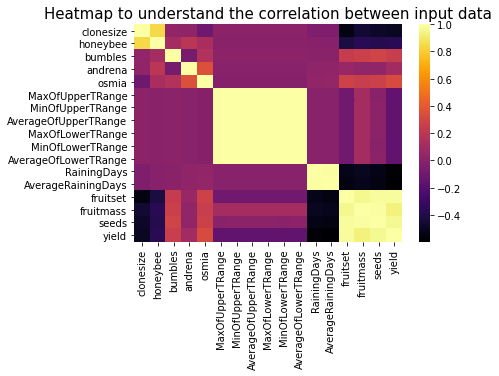

In [18]:
sns.heatmap(c, cmap="inferno")
plt.title('Heatmap to understand the correlation between input data', fontsize=15)
plt.show()

# Multiple Linear Regression

**Modelling**

In [19]:
X = dataset[['clonesize','honeybee','bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]
X

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.558394,0.478666,39.448650
755,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.494678,0.429703,34.784888
756,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.502842,0.430369,35.185971
757,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.513889,0.458966,37.209554


In [20]:
y = dataset['yield']
y

0      3813.165795
1      4947.605663
2      3866.798965
3      4303.943030
4      3436.493543
          ...     
754    7184.013843
755    6292.960756
756    6374.444297
757    6180.951419
758    5700.243243
Name: yield, Length: 752, dtype: float64

In [21]:
print(X.shape)

(752, 16)


In [22]:
print(y.shape)

(752,)


In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
print(X_train.shape)

(601, 16)


In [25]:
print(X_val.shape)

(151, 16)


In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

**Model Evaluation**

In [27]:
reg.fit(X_train, Y_train)

LinearRegression()

**Prediction**

In [28]:
Y_pred = reg.predict(X_val)

In [29]:
rmse = np.sqrt(np.mean((Y_val - Y_pred)**2))
rmse

109.94934345005935

In [30]:
from sklearn.metrics import r2_score
r2_score(Y_pred, Y_val)

0.9924960202121331

In [49]:
data_pred = X_val.iloc[8,:] 
data_pred_array = data_pred.values.reshape(1, -1)


reg.predict(data_pred_array)

array([6793.72119141])

# Random Forest Regression

**Modelling**

In [31]:
from sklearn.ensemble import RandomForestRegressor

**Model Evaluation and Prediction**

In [32]:
params = {
    'n_estimators' : [25, 50, 75, 100, 150, 200],
    'max_depth' : [2, 4, 6, 8, 10]  
}
rfreg = GridSearchCV(RandomForestRegressor(random_state=0), params)
rfreg.fit(X_train, Y_train)

Y_pred = rfreg.predict(X_val)

rmse = np.sqrt(np.mean((Y_val - Y_pred)**2))

print("RMSE : {:.2f}".format(rmse))

RMSE : 139.50


In [33]:
r2_score(Y_pred, Y_val)

0.9877495617813413

# XGBoost

In [66]:
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [67]:
regressor.fit(X_train, Y_train)

[16:22:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [68]:
Y_pred = regressor.predict(X_val)

In [69]:
rmse = np.sqrt(np.mean((Y_val - Y_pred)**2))
rmse

121.06096362790943

In [70]:
r2_score(Y_pred, Y_val)

0.9909484944500087

# Explainable AI

In [71]:
shap_values = shap.TreeExplainer(regressor).shap_values(X_val)

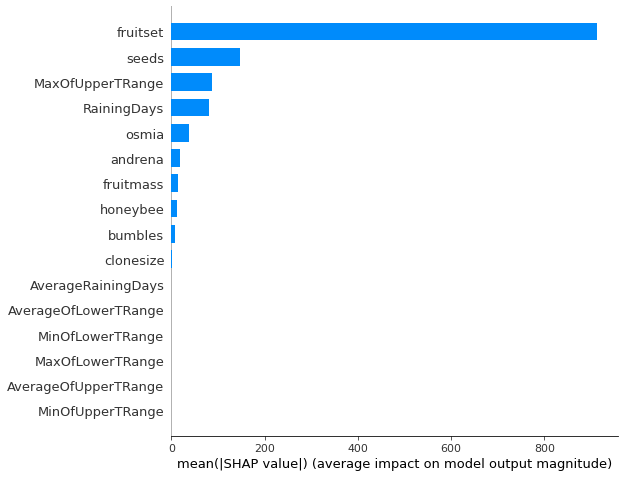

In [72]:
shap.summary_plot(shap_values, X_val, plot_type="bar")

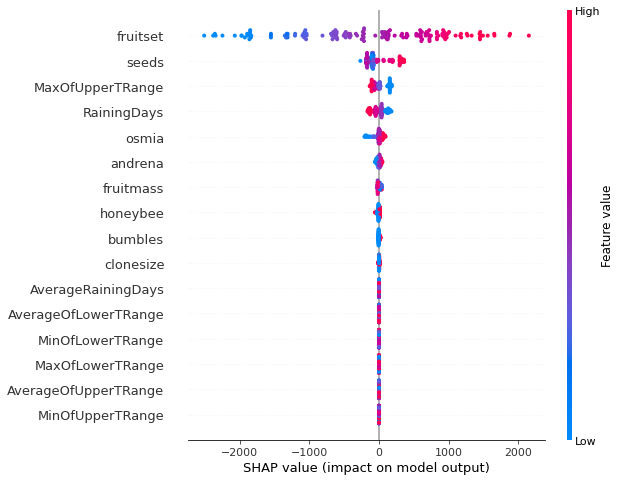

In [73]:
shap.summary_plot(shap_values, X_val)

In [59]:
exp = shap.Explainer(reg, X_train)
shap_values = exp.shap_values(data_pred)

In [60]:
shap.initjs()
shap.force_plot(exp.expected_value, shap_values, data_pred)

In [55]:
#end